# 1. Introduction to OpenCV for CCTV Analisis

**Objective:** <br>
configure OpenCV and learn to load and visualazed images and videos from CCTV sistemes

In [1]:
import cv2
import matplotlib.pyplot as plt

**1.1) Load 1 image**

Image route capted by CCTV camera

In [2]:
image_path = 'data/cctv_image.jpg'
image = cv2.imread(image_path)

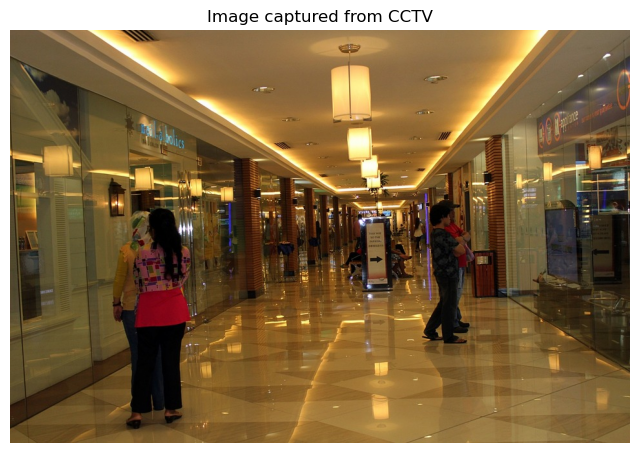

In [3]:
#Verify if the image is loaded correctly
if image is None:
    print("Error: Could not load image. Verify the path.")
else:
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title('Image captured from CCTV')
    plt.axis('off')
    plt.show()

**1.2) Opening webcam with OpenCV**

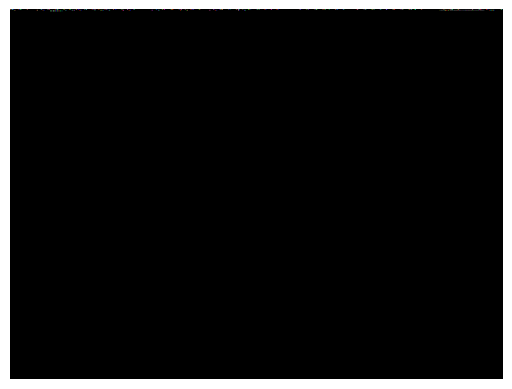

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


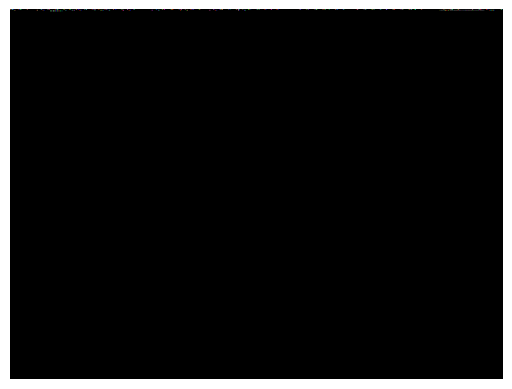

In [12]:
from IPython.display import display, clear_output
#Open webcam
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Show the frame in window named 'Frame from CCTV'
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())

        # Wait 1 ms to dectect key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
# Note: To exit the webcam window, press 'q'.

Don't have webcam on computer

**1.3) Load a video**

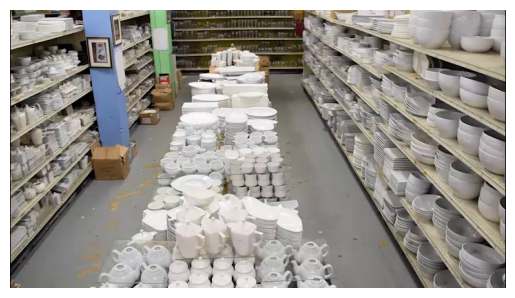

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


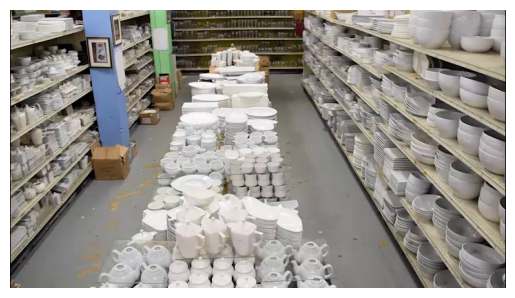

In [17]:
path_video = 'data/store-aisle-detection.mp4'

#Load the video
cap = cv2.VideoCapture(path_video)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Show the frame in window named 'Frame from CCTV'
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())

        # Wait 1 ms to dectect key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
# Note: To exit the webcam window, press 'q'.

## 2) Techniques improving, correction, annotations images

**2.1) Adjusting brightness and constrast**

In [48]:
#Loading the image CCTV
image_path = 'data/cctv_image.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Error: Could not load image. Verify the path.")
    exit()

#Adjusting the brightness and contrast
alpha = 1.2  # Contrast control (bigger than 1.0 increases contrast)
beta = 30    # Brightness control (positive value increases brightness)
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

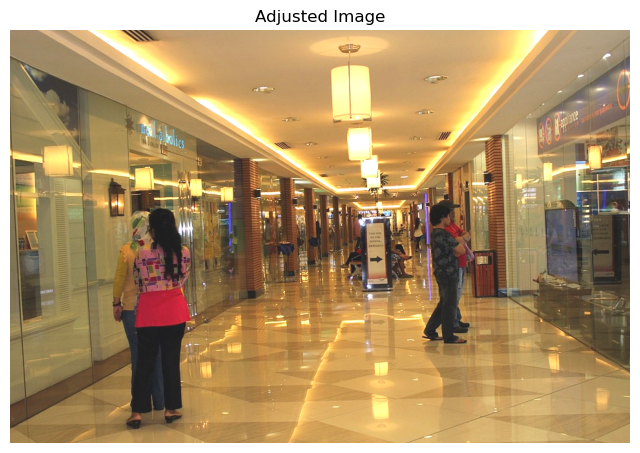

In [49]:
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Display the adjusted image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(adjusted)   
plt.title('Adjusted Image')
plt.axis('off')
plt.show()

In [21]:
# Saving the adjusted image
output_path = 'results/adjusted_cctv_image.jpg'
cv2.imwrite(output_path, adjusted)


True

**2) Color correction and normalization**

In [54]:
import numpy as np

The color space HSV(Hue, Saturation, Value) represents the colors by his hue, saturation and value. Convert an image to HSV facilitates the saturation manipulation, allowing adjust the intensity or purity from de colors without affect the brightness or the hue 

In [55]:
#Convert the image adjusted to HSV space to modify the saturation
hsv = cv2.cvtColor(adjusted, cv2.COLOR_RGB2HSV)

In [56]:
h, s, v = cv2.split(hsv)

saturation =  5

# Increase saturation
s = cv2.multiply(s, saturation)
s = np.clip(s, 0, 255).astype(np.uint8)
hsv_adjusted = cv2.merge([h, s, v])
color_corrected = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2RGB)

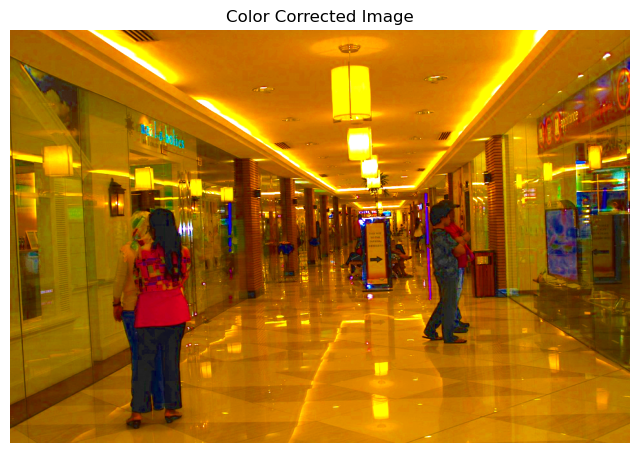

In [57]:
#Show the images using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(color_corrected)
plt.title('Color Corrected Image')
plt.axis('off')
plt.show()

In [58]:
#Convert the image from BGR to RGB format
color_corrected = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

#saving the color corrected image
output_path = 'results/color_corrected_cctv_image.jpg'
cv2.imwrite(output_path, color_corrected)

True

**2.3) Application with anotations**

In [62]:
# Make a copy of the image for annotation
annotated = image.copy()

#Draw a line: from (120,250) until (200,250), on blue BGR: (255,0,0) with thickness 3
cv2.line(annotated, (150, 250), (350, 250), (255, 0, 0), 3)
#Draw a rectangle: from  left corner(150,300), right corner (350,600), on green BGR: (0,255,0) with thickness 3
cv2.rectangle(annotated, (150, 300), (350, 600), (0, 255, 0), 3)
#Write text: 'Person detected' on the image, in red BGR: (0,0,255) located at (200, 200) with font size 1.5 and thickness 2
cv2.putText(annotated, 'Person detected', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)

array([[[ 64,  89, 109],
        [ 63,  88, 108],
        [ 61,  86, 106],
        ...,
        [ 81, 103, 115],
        [ 82, 104, 116],
        [ 83, 105, 117]],

       [[ 65,  90, 110],
        [ 64,  89, 109],
        [ 62,  87, 107],
        ...,
        [ 84, 106, 118],
        [ 83, 105, 117],
        [ 83, 105, 117]],

       [[ 66,  91, 111],
        [ 65,  90, 110],
        [ 63,  88, 108],
        ...,
        [ 86, 107, 122],
        [ 83, 104, 119],
        [ 82, 103, 118]],

       ...,

       [[ 38,  83, 110],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 56, 103, 134],
        [ 57, 104, 135],
        [ 58, 105, 136]],

       [[ 39,  84, 111],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 55, 105, 135],
        [ 55, 104, 136],
        [ 57, 106, 138]],

       [[ 39,  84, 111],
        [ 39,  84, 111],
        [ 38,  83, 110],
        ...,
        [ 54, 104, 134],
        [ 55, 103, 137],
        [ 57, 108, 140]]

In [64]:
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

(-0.5, 959.5, 639.5, -0.5)

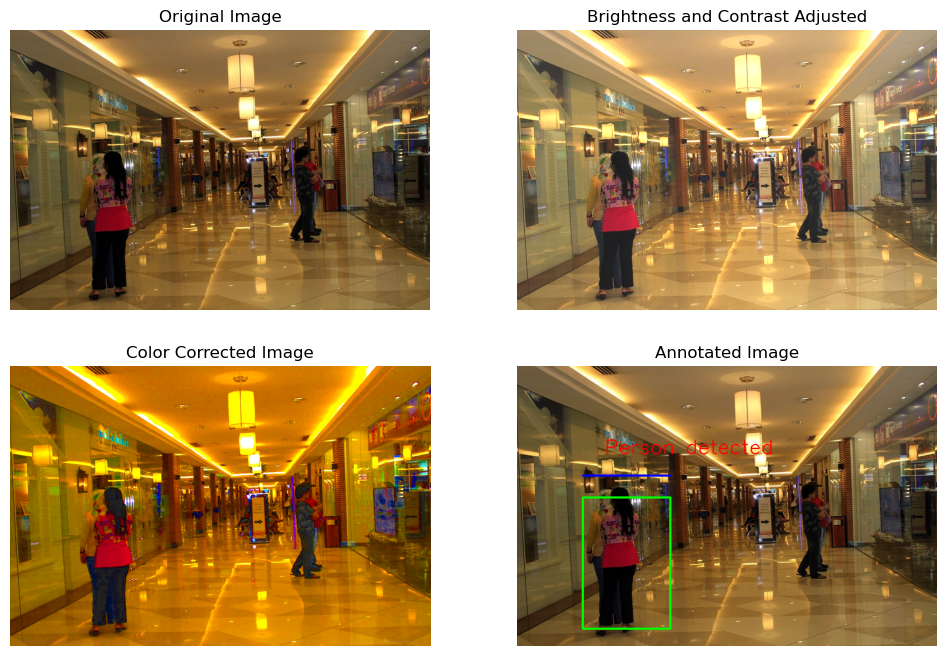

In [65]:
#Conver from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adjusted_rgb)
plt.title('Brightness and Contrast Adjusted')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(color_corrected_rgb)
plt.title('Color Corrected Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(annotated_rgb)
plt.title('Annotated Image')
plt.axis('off')